# Creacion de red neuronal para predecir precio de inversiones en la bolsa


### se importaran las librerias correspondientes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


creo una variable que va a contener la ruta de mi conjunto de datos


In [ ]:
ypf_data = '/content/drive/MyDrive/Colab Notebooks/scrapping/ypf.csv'

- importo la el conjnto de datos
- convierto la columna 'Date'
- luego  la paso a que sea el indice
- por ultimo la ordeno

In [ ]:
df_rl = pd.read_csv(ypf_data, parse_dates=['Date'])
df_rl.set_index("Date", inplace=True)
df_rl = df_rl.sort_index()

-uso shape para corroborar sus dimensiones

In [ ]:
df_rl.shape

(7931, 6)

- creo dos funciones que eliminaran las filas qe contengan "-" y "Dividend" ya que es solo basura

In [ ]:
df_rl = df_rl[~df_rl.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]
df_rl = df_rl[~df_rl.apply(lambda row: row.astype(str).str.contains('Dividend').any(), axis=1)]

In [ ]:
df_rl.shape

(7862, 6)

- se reemplazan los comas de los numero en "Volume"
- se tranforma "Open" a tipo flotante porque esa columna es tomada como un  string

In [ ]:
df_rl['Volume'] = df_rl['Volume'].replace(',', '', regex=True).astype(float)
df_rl['Open'] = df_rl['Open'].astype(float)

- se crea la columna "Time" que son numeros consecutivos

In [ ]:
df_rl['Time'] = (df_rl.index - df_rl.index.min()).days

In [ ]:
df_rl_ = df_rl[['Time','Close']].dropna()

-  se divide el conjunto de datos en x e y para realizar una regresion lineal que es meramente para crear una linea de tendencia, no es el algoritmo que se usara para las predicciones solo es estetico

In [ ]:
x = df_rl_[['Time']].values
y = df_rl_['Close'].values

In [ ]:
x.shape

(7862, 1)

In [ ]:
y.shape

(7862,)

- importacion de la libreria necesaria

In [ ]:
from sklearn.linear_model import LinearRegression


- creacion y  entrenamiento del modelo de regresion lineal

In [ ]:
modelo_lr = LinearRegression()
modelo_lr.fit(x,y)

LinearRegression()

In [ ]:
predictions = modelo_lr.predict(x)

In [ ]:
coeficiente = modelo_lr.coef_[0]
intercepto = modelo_lr.intercept_

# y = mx + b

print(coeficiente) # mx
print(intercepto) # b

-0.0016963884637008842
36.15109217889297


- generacion de grafico con linea de tendencia

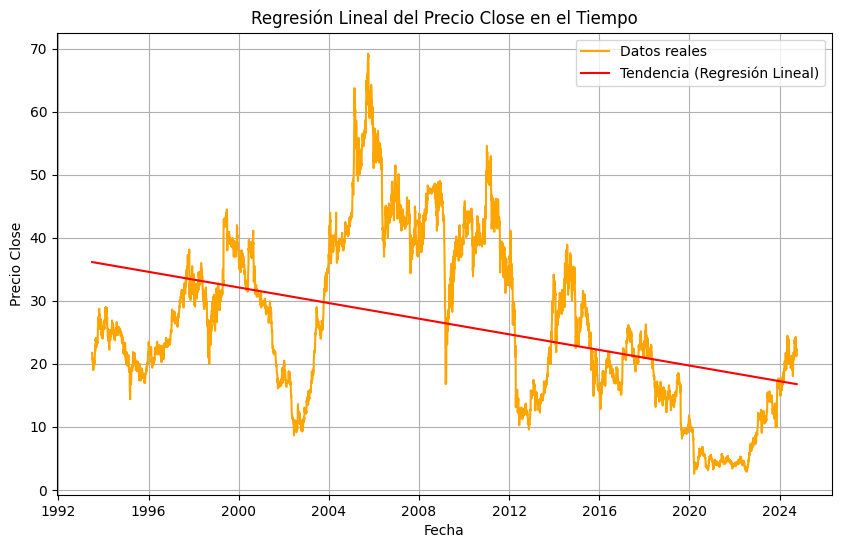

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_rl_.index, df_rl_['Close'], label='Datos reales', color='orange')

if coeficiente < 0:
    plt.plot(df_rl_.index, predictions, label='Tendencia (Regresión Lineal)', color='red')
else:
  plt.plot(df_rl_.index, predictions, label='Tendencia (Regresión Lineal)', color='green')

plt.xlabel('Fecha')
plt.ylabel('Precio Close')
plt.legend()
plt.grid(True)
plt.title('Regresión Lineal del Precio Close en el Tiempo')
plt.show()

- nuevamente limpieza de los datos (esto se hizo antes de todo lo anterior simplemente ignorarlo. podria haber credo las copias pertienentes en su momento, algo a corregir en el futuro)

In [ ]:
df = pd.read_csv(ypf_data, parse_dates= ['Date'])
df.set_index("Date", inplace=True)
df  = df.sort_index()


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-06-30,22.00,23.00,21.63,21.75,5.66,"9,060,600"
1993-07-01,21.38,21.63,21.00,21.25,5.53,"4,273,100"
1993-07-02,21.13,21.25,20.75,21.13,5.50,"2,504,500"
1993-07-06,20.88,21.00,20.63,20.75,5.40,"2,030,400"
1993-07-07,20.88,21.00,20.63,20.88,5.43,"2,447,800"
...,...,...,...,...,...,...
2024-09-30,21.40,21.54,21.01,21.21,21.21,"1,806,800"
2024-10-01,21.17,21.86,21.08,21.67,21.67,"1,764,400"
2024-10-02,22.00,22.02,21.50,21.69,21.69,"1,404,100"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7931 entries, 1993-06-30 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7931 non-null   object 
 1   High       7873 non-null   float64
 2   Low        7873 non-null   float64
 3   Close      7873 non-null   float64
 4   Adj Close  7873 non-null   float64
 5   Volume     7873 non-null   object 
dtypes: float64(4), object(2)
memory usage: 433.7+ KB


In [ ]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]
df = df[~df.apply(lambda row: row.astype(str).str.contains('Dividend').any(), axis=1)]



In [ ]:
df['Volume'] = df['Volume'].replace(',', '', regex=True).astype(float)
df['Open'] = df['Open'].astype(float)

In [ ]:
df.shape

(7862, 6)

- se utiliza el metodo .info para corroborar que los datos esten en el formato correcto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7862 entries, 1993-06-30 to 2024-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7862 non-null   float64
 1   High       7862 non-null   float64
 2   Low        7862 non-null   float64
 3   Close      7862 non-null   float64
 4   Adj Close  7862 non-null   float64
 5   Volume     7862 non-null   float64
dtypes: float64(6)
memory usage: 430.0 KB


- se crean las variables "maximo", "minimo", y "media", para hacer un rapido analisis estadistico

In [ ]:
minimo = df['Adj Close'].min()
maximo = df['Adj Close'].max()
media = df['Adj Close'].mean()

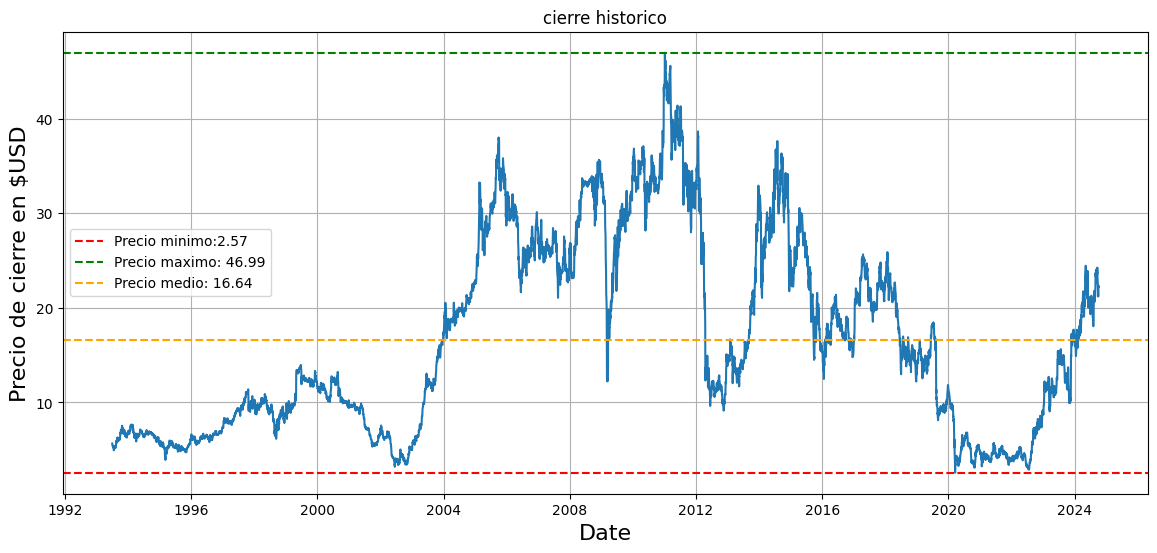

In [ ]:
plt.figure(figsize=(14,6))
plt.title('cierre historico')
plt.plot(df['Adj Close'])
plt.axhline(df['Adj Close'].min(), color='red', linestyle='--', label = f'Precio minimo:{minimo}')
plt.axhline(df['Adj Close'].max(), color='green', linestyle='--', label = f'Precio maximo: {maximo}')
plt.axhline(df['Adj Close'].mean(), color='orange', linestyle='--', label  = f'Precio medio: {media.round(2)}')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precio de cierre en $USD', fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

se calculara la  Media Móvil Simple de 20 periodos (Simple Moving Average) que  es un indicador técnico que se utiliza para analizar tendencias en los precios de activos financieros, como acciones, bonos, o divisas.

sirver para:
- identificar tendencias
- suavizar fluctuaciones

ademas se calcula tambien la Media Móvil Exponencial de 20 periodos (Exponential Moving Average), otro indicador técnico utilizado en análisis de inversiones, similar al SMA_20, pero con una diferencia clave: la EMA le da más peso a los precios recientes. Esto hace que sea más sensible a los cambios recientes en el precio.

sirve para:
- Mayor sensibilidad a cambios recientes
- Señales de compra/venta
- Complemento con otras EMAs

Diferencia clave entre EMA y SMA
- EMA: Más reactiva, ideal para traders que buscan señales rápidas.
- SMA: Más estable, usada para tendencias a más largo plazo.



In [ ]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [ ]:
df.head(25)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20
Date,,,,,,,,
1993-06-30,22.00,23.00,21.63,21.75,5.66,9060600.0,NaN,21.750000
1993-07-01,21.38,21.63,21.00,21.25,5.53,4273100.0,NaN,21.702381
1993-07-02,21.13,21.25,20.75,21.13,5.50,2504500.0,NaN,21.647868
1993-07-06,20.88,21.00,20.63,20.75,5.40,2030400.0,NaN,21.562357
1993-07-07,20.88,21.00,20.63,20.88,5.43,2447800.0,NaN,21.497371
1993-07-08,20.88,21.00,20.63,20.75,5.40,1115800.0,NaN,21.426193
1993-07-09,20.75,20.75,20.25,20.25,5.27,1615700.0,NaN,21.314174
1993-07-12,20.25,20.63,20.25,20.38,5.30,2075000.0,NaN,21.225205
1993-07-13,20.38,20.50,20.25,20.50,5.33,1914700.0,NaN,21.156138


- se crea una celda para graficar:
  - precio de cierre
  - Media Móvil Simple
  - Media Móvil Exponencial

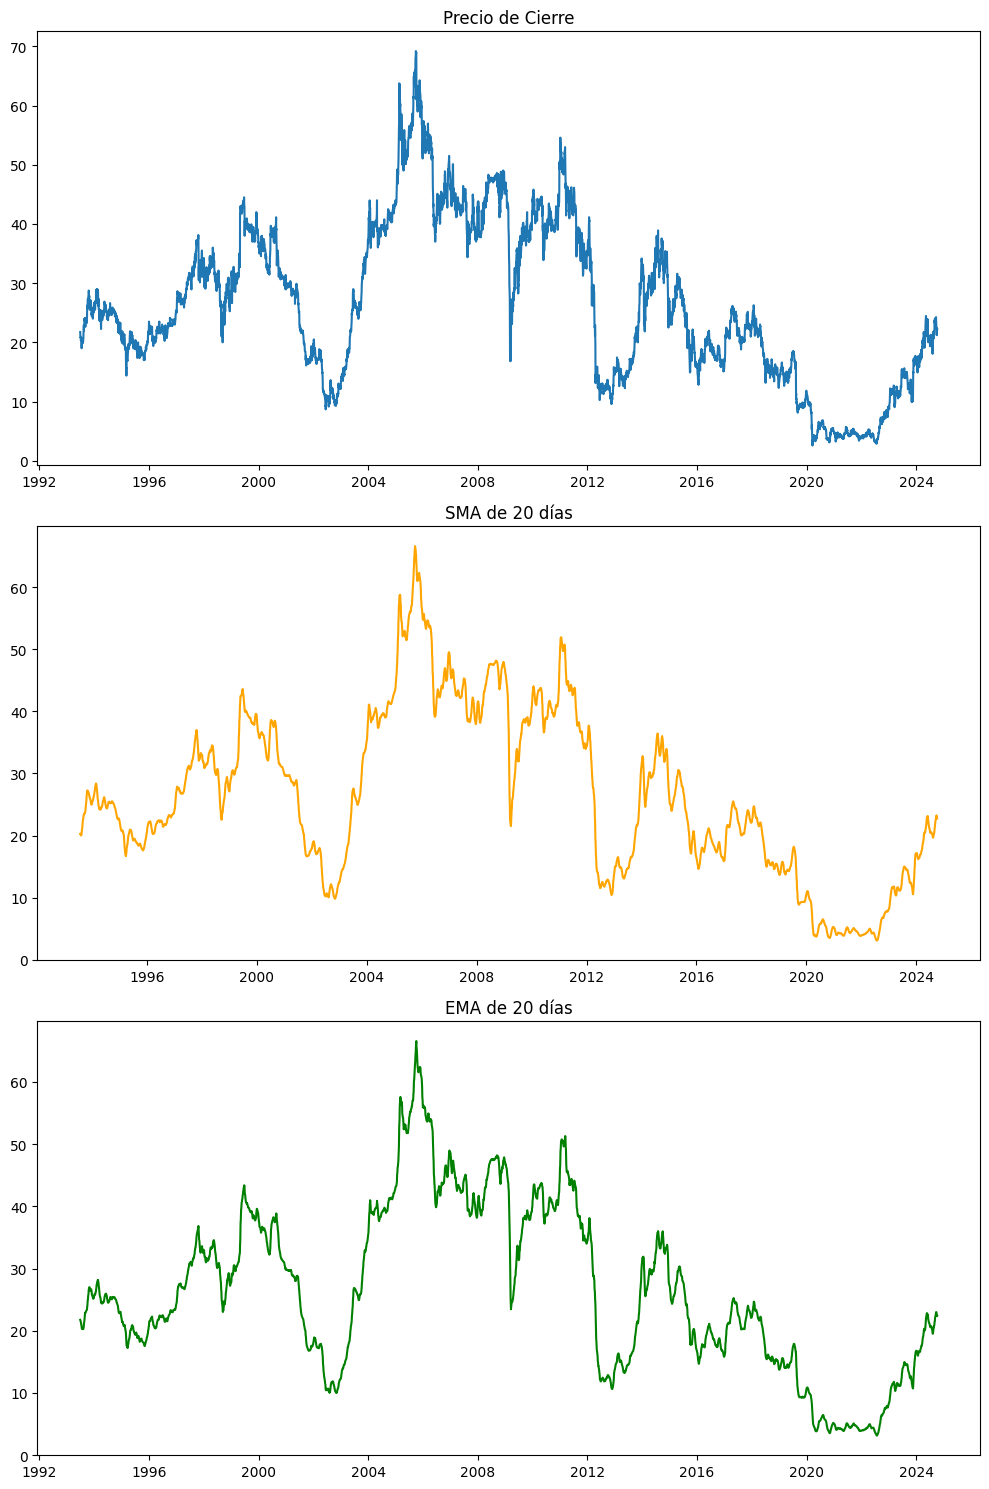

In [ ]:
# Crear una figura con 3 filas y 1 columna
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graficar en el primer subgráfico (posición 0)
axes[0].plot(df['Close'])
axes[0].set_title('Precio de Cierre')

# Graficar en el segundo subgráfico (posición 1)
axes[1].plot(df['SMA_20'], color='orange')
axes[1].set_title('SMA de 20 días')

# Graficar en el tercer subgráfico (posición 2)
axes[2].plot(df['EMA_20'], color='green')
axes[2].set_title('EMA de 20 días')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

- se calcula la volatilidad

In [ ]:
df['Volatility'] = df['Close'].rolling(window=20).std()
df.head(25)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,Volatility
Date,,,,,,,,,
1993-06-30,22.00,23.00,21.63,21.75,5.66,9060600.0,NaN,21.750000,NaN
1993-07-01,21.38,21.63,21.00,21.25,5.53,4273100.0,NaN,21.702381,NaN
1993-07-02,21.13,21.25,20.75,21.13,5.50,2504500.0,NaN,21.647868,NaN
1993-07-06,20.88,21.00,20.63,20.75,5.40,2030400.0,NaN,21.562357,NaN
1993-07-07,20.88,21.00,20.63,20.88,5.43,2447800.0,NaN,21.497371,NaN
1993-07-08,20.88,21.00,20.63,20.75,5.40,1115800.0,NaN,21.426193,NaN
1993-07-09,20.75,20.75,20.25,20.25,5.27,1615700.0,NaN,21.314174,NaN
1993-07-12,20.25,20.63,20.25,20.38,5.30,2075000.0,NaN,21.225205,NaN
1993-07-13,20.38,20.50,20.25,20.50,5.33,1914700.0,NaN,21.156138,NaN


## Creacion de la red neuronal

para este apartado se escalaran los datos con min max scaler entre el rango de [0;1]

In [ ]:
escalador = MinMaxScaler(feature_range=(0,1))
df_escalado = escalador.fit_transform(df['Adj Close'].values.reshape(-1,1))

df_escalado

array([[0.06956326],
       [0.06663665],
       [0.06596128],
       ...,
       [0.43043674],
       [0.44552004],
       [0.44281855]])

- se crea la varaible "dias_prediccion" ademas de las listas vacias de "x_train" e "y_train"

In [ ]:
dias_prediccion = 120

x_train = []
y_train = []


 - se usa un bucle for para realizar el set de entrenamiento donde se toman (en este caso) desde el dia 0 al dia 120 dias el "x" y el "y" es el dia 121
 y asi sucesivamente

 - luego esas listas se tranforman en arrays para un mejor uso en los frameworks de tensorflow y pytorch

In [ ]:
for i in range(dias_prediccion, len(df_escalado)):
  x_train.append(df_escalado[i-dias_prediccion:i,0])
  y_train.append(df_escalado[i,0])

x_train ,y_train = np.array(x_train), np.array(y_train)

- se redimensiona el x_train
para que tenga el formato de (muestra, ventana, caracteristica)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(7742, 120, 1)

creacion de la red neuronal

en este caso  utilizare el framework de tensorFlow y mi modelos sera de tipo Sequential()

se agregaran 3 capas de redes LSTM, 3 dropout y una de tipo Dense para la salida

early_stopping es una técnica que detiene el entrenamiento del modelo cuando la métrica que se está monitoreando (por ejemplo, la pérdida en el conjunto de validación, val_loss) deja de mejorar durante un número consecutivo de épocas (patience)


se compila y entrena



In [ ]:
modelo = Sequential()

modelo.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
modelo.add(Dropout(0.4))
modelo.add(LSTM(units= 32, return_sequences = True))
modelo.add(Dropout(0.4))
modelo.add(LSTM(units= 32))
modelo.add(Dropout(0.4))
modelo.add(Dense (units = 1))

modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
modelo.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

#modelo.fit(x_train,y_train, epochs=5, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


194/194 ━━━━━━━━━━━━━━━━━━━━ 54s 254ms/step - loss: 0.0207 - mape: 31.5777 - val_loss: 8.8921e-04 - val_mape: 64498.0977
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 80s 244ms/step - loss: 0.0057 - mape: 15.3493 - val_loss: 5.9750e-04 - val_mape: 66198.3047
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 246ms/step - loss: 0.0043 - mape: 13.4407 - val_loss: 7.0604e-04 - val_mape: 70226.9141
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 244ms/step - loss: 0.0036 - mape: 14.0739 - val_loss: 5.9396e-04 - val_mape: 65167.7266
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 50s 256ms/step - loss: 0.0030 - mape: 13.3508 - val_loss: 4.9475e-04 - val_mape: 47021.3555
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 80s 247ms/step - loss: 0.0032 - mape: 14.3897 - val_loss: 5.1803e-04 - val_mape: 58399.4531
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 247ms/step - loss: 0.0026 - mape: 15.3447 - val_loss: 4.3888e-04 - val_mape: 52410.8242
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 82s 246ms/step - loss: 0.0024 - mape: 14.8218 -

- una vez entrnado el modelo se prosigue a ver como predice. en esta parte se vuelve a llamar otro data set, esto es porque la informacion que tenia del dataset con el que se entreno el modelo  no estaba actualizada al momento de su entrenamiento, por lo tanto descargue un nuevo conjunto de datos con algo de no mas de 30 dias de inversiones de YPF

In [ ]:
ruta_ = '/content/drive/MyDrive/Colab Notebooks/scrapping/YPF_datos.csv'

In [ ]:
df_ = pd.read_csv(ruta_, parse_dates= ['Date'])
df_.set_index("Date", inplace=True)
df_.sort_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-07,22.24,22.39,21.80,21.98,21.98,"1,093,100"
2024-10-08,21.63,22.11,21.40,22.10,22.10,"920,000"
2024-10-09,21.95,24.05,21.78,23.59,23.59,"3,918,600"
2024-10-10,23.71,24.60,23.56,24.25,24.25,"2,597,700"
2024-10-11,24.24,25.09,24.01,24.88,24.88,"1,896,000"
2024-10-14,24.94,25.40,24.57,25.25,25.25,"1,913,300"
2024-10-15,24.87,25.76,24.39,25.74,25.74,"2,083,200"
2024-10-16,25.69,25.89,24.78,24.88,24.88,"1,585,500"
2024-10-17,25.00,25.47,24.77,25.02,25.02,"1,435,800"


In [ ]:
df_ = df_[~df_.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]
df_ = df_[~df_.apply(lambda row: row.astype(str).str.contains('Dividend').any(), axis=1)]
df_['Volume'] = df_['Volume'].replace(',', '', regex=True).astype(float)
df_['Open'] = df_['Open'].astype(float)


In [ ]:
precios_actuales = df_['Adj Close'].values
precios_actuales

array([29.51, 29.84, 29.24, 29.32, 28.25, 27.49, 26.59, 25.37, 24.51,
       24.55, 24.84, 25.51, 25.65, 25.11, 24.3 , 24.82, 24.87, 25.  ,
       25.02, 24.88, 25.74, 25.25, 24.88, 24.25, 23.59, 22.1 , 21.98])

In [ ]:
df_completo = pd.concat((df['Adj Close'], df_['Adj Close']), axis=0)

In [ ]:
modelo_inputs = df_completo[len(df_completo) - len(df_) - dias_prediccion:].values
modelo_inputs = modelo_inputs.reshape(-1,1)
modelo_inputs = escalador.transform(modelo_inputs.reshape(-1,1))

modelo_inputs

array([[0.39801891],
       [0.38045925],
       [0.3714543 ],
       [0.37753264],
       [0.4101756 ],
       [0.41197659],
       [0.3959928 ],
       [0.39779379],
       [0.4187303 ],
       [0.42570914],
       [0.43651508],
       [0.43921657],
       [0.44552004],
       [0.46848267],
       [0.47973886],
       [0.48311571],
       [0.49279604],
       [0.49099505],
       [0.45497524],
       [0.45497524],
       [0.46037821],
       [0.48041423],
       [0.47433588],
       [0.46983341],
       [0.47726249],
       [0.47185952],
       [0.43223773],
       [0.42278253],
       [0.41512832],
       [0.44304367],
       [0.44777127],
       [0.48041423],
       [0.46465556],
       [0.43966682],
       [0.39869428],
       [0.41062584],
       [0.39464205],
       [0.39284106],
       [0.41107609],
       [0.39846916],
       [0.40747411],
       [0.4187303 ],
       [0.41220171],
       [0.40229626],
       [0.41512832],
       [0.40950023],
       [0.39914453],
       [0.409

- se crea el conjunto de datos de testeo, se predice el nuevo conjuto de datos y se reescalan

In [ ]:
x_test = []

for i in range(dias_prediccion, len(modelo_inputs)):
  x_test.append(modelo_inputs[i-dias_prediccion:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

prediccion_precios = modelo.predict(x_test)
prediccion_precios = escalador.inverse_transform(prediccion_precios)

prediccion_precios

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


array([[21.366196],
       [21.810076],
       [22.836958],
       [24.306894],
       [25.956493],
       [27.43465 ],
       [28.445618],
       [28.820673],
       [28.529188],
       [27.680714],
       [26.508343],
       [25.293509],
       [24.308523],
       [23.73275 ],
       [23.599825],
       [23.805544],
       [24.220963],
       [24.69749 ],
       [25.109047],
       [25.371187],
       [25.44533 ],
       [25.38504 ],
       [25.234318],
       [25.031986],
       [24.79519 ],
       [24.523853],
       [24.171646]], dtype=float32)

- se hace el plot correspondiente

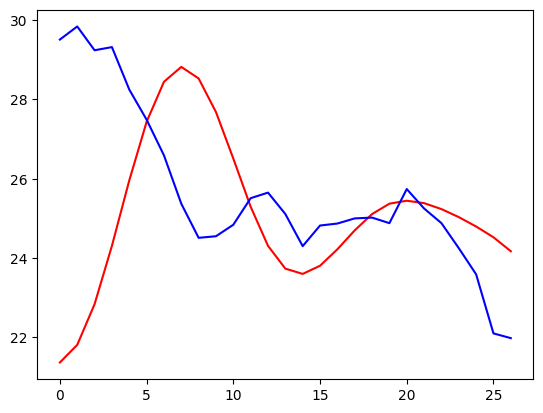

In [ ]:
plt.plot(prediccion_precios, color='red', label='Prediccion')
plt.plot(precios_actuales, color='blue', label='Precio real')


In [ ]:
media

16.638081912999237

el modelo predice bastante bien.

igualmente todo lo que se pueda decir de este modelo es apresurado ya que solo se testeo con algo mas de 30 datos. para mejorar esto se deberia usar al menos el 70% para entrenamiento y el otro 30% como testeo.

este modelo se subira hoy 28/11 asi como esta. y se modificara posteriormente con el set de datos correspondiente

In [ ]:
rentabilidad = 1

for i in range(1, len(precios_actuales)):
    if prediccion_precios[i] > precios_actuales[i-1]:  # Comparación entre predicción y precio anterior
        rentabilidad *= precios_actuales[i] / precios_actuales[i-1]

print((rentabilida - 1)*100,'%')

-15.592397516080103 %
